- Học và tên: PHẠM THỊ HOÀ
- MSHV: 23C23007

Chủ đề 3: Personal Medical Cost Dataset

In [2]:
library(faraway)
library(MASS)
library(ggplot2)
library(lmtest)
library(magrittr)
library(car)
library(caret)


In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "insurance.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 1338    7

- Bộ dữ liệu gồm có 1338 dòng và 7 cột

### NỘI DUNG CÁC CỘT DỮ LIỆU
- age: Tuổi của người được bảo hiểm.
- sex: Giới tính của người được bảo hiểm
- bmi: Chỉ số khối cơ thể (Body Mass Index - BMI) của người được bảo hiểm. Chỉ số này được tính bằng cách chia cân nặng (kg) cho bình phương chiều cao (m)
- children: Số con của người được bảo hiểm.
- smoker: Trạng thái hút thuốc của người được bảo hiểm
    - yes: Có hút thuốc
    - no: Không hút thuốc 
- region: Vùng miền nơi người được bảo hiểm sinh sống.
    - northeast: Đông Bắc
    - northwest: Tây Bắc
    - southeast: Đông Nam
    - southwest: Tây Nam
- charges: Số tiền bảo hiểm y tế phải trả

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [6]:
# Tóm tắt thống kê mô tả
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

- age (tuổi: 18-64, trung bình: 39.21): Biến liên tục
- sex (giới tính: 2 loại female hoặc male): Biến phân loại
- bmi (chỉ số BMI: 15.96-53.13, trung bình: 30.66): Biến liên tục
- children (số con: 0-5, trung bình: 1.095): Biến liên tục
- smoker (hút thuốc: có hút thuốc: yes, không hút thuốc: no): Biến phân loại
- region (vùng miền: northeast: Đông Bắc, northwest: Tây Bắc, southeast: Đông Nam, southwest: Tây Nam): Biến phân loại
- charges (phí bảo hiểm: 1122-63770, trung bình: 13270): Biến liên tục (biến phụ thuộc)

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "age"
[1] 47
[1] "sex"
[1] 2
[1] "bmi"
[1] 548
[1] "children"
[1] 6
[1] "smoker"
[1] 2
[1] "region"
[1] 4
[1] "charges"
[1] 1337


In [8]:
list_ltuc = c("age", "bmi", "children")
list_ploai = c("sex", "smoker", "region")

In [9]:
colSums(is.na(df))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

- Không có dữ liệu thiếu

### XỬ LÝ BIẾN LIÊN TỤC

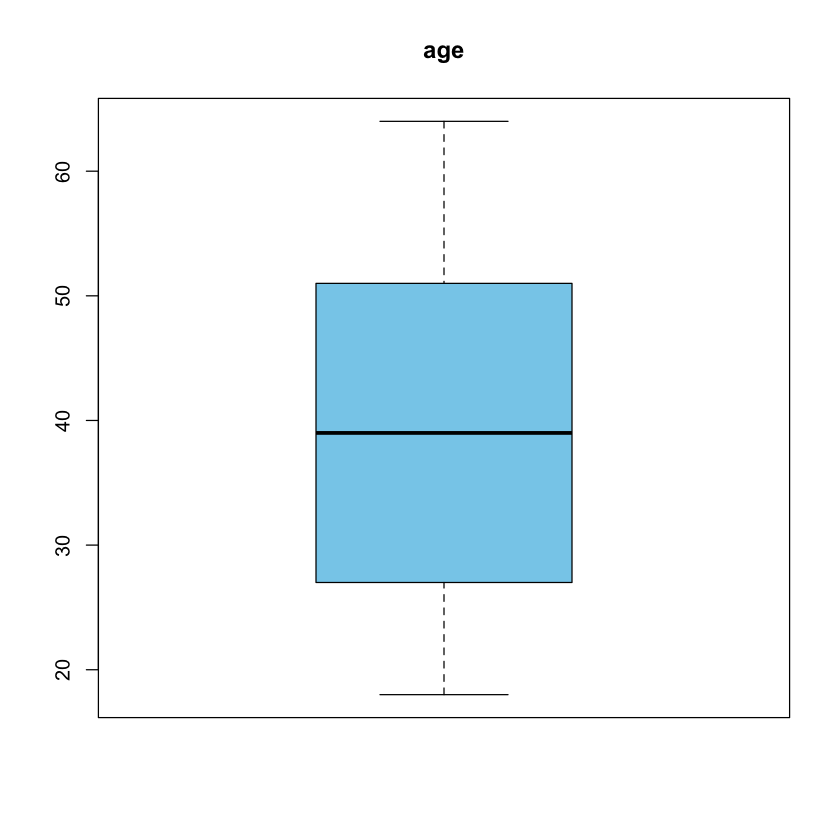

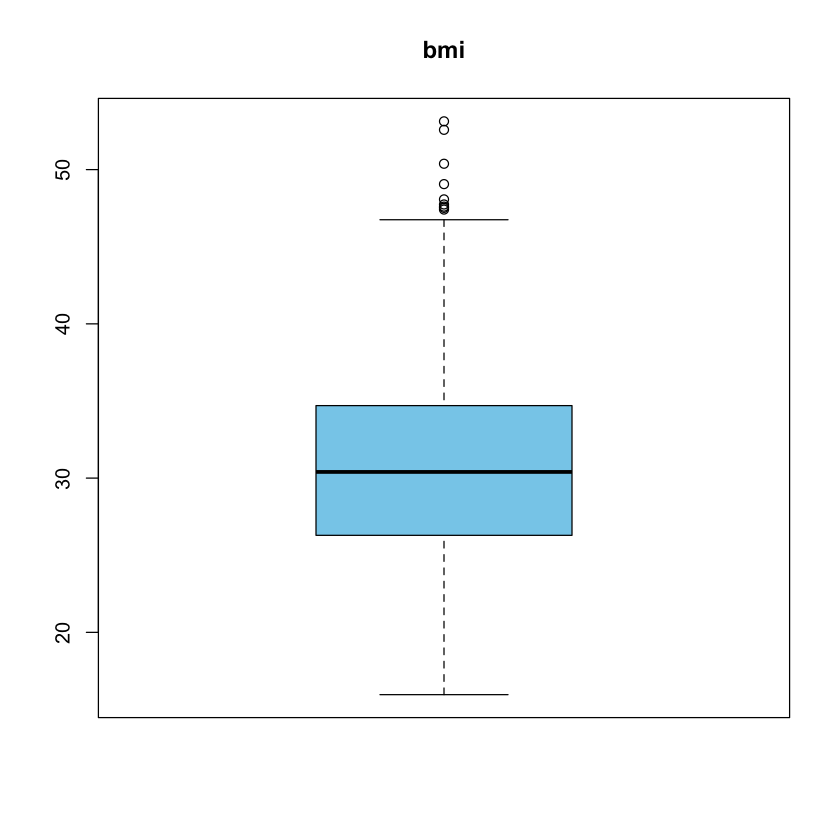

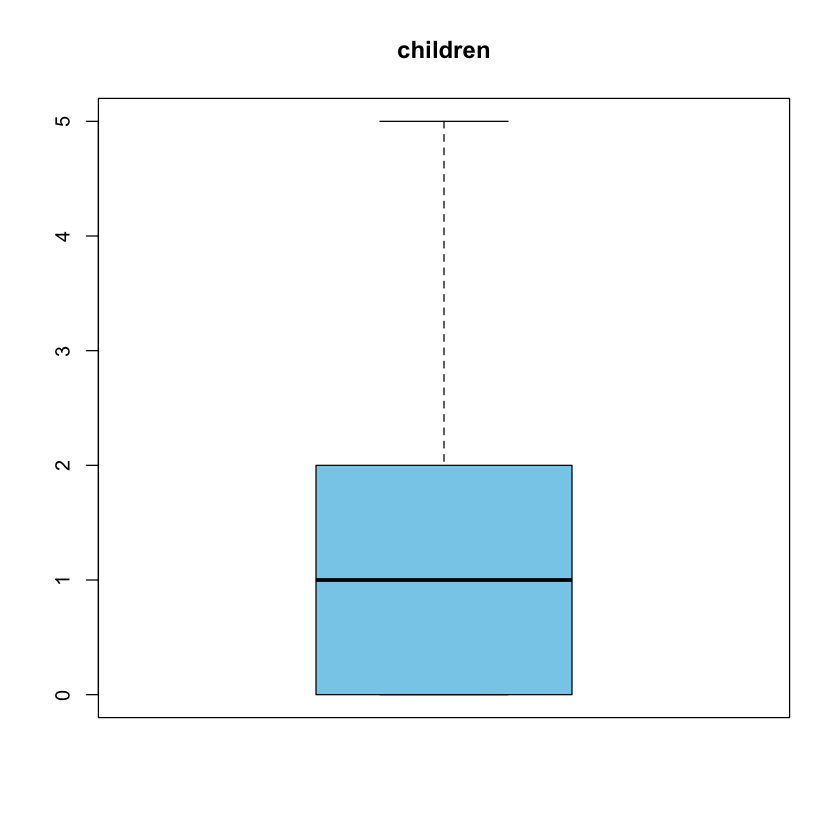

In [10]:
# Vẽ Boxplot cho dữ liệu liên tục:
for (col in list_ltuc) {
    boxplot(df[[col]], col = "skyblue", main = col)
}


- Dữ liệu bmi tồn tại giá trị ngoại lai

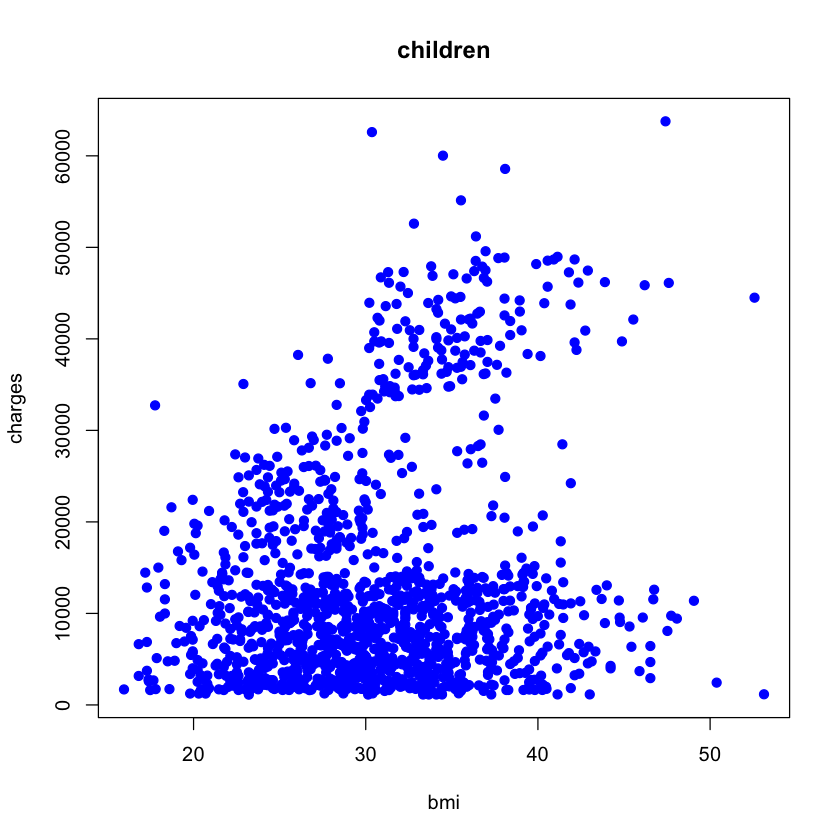

In [11]:
# Vẽ scatter plotcho từ biến bmi và phụ thuộc charges
plot(df$bmi, df$charges, main=col, xlab="bmi", ylab="charges", pch=19, col="blue")


- NHẬN XÉT: Một số giá trị có bmi cao đang gây ra ngoại lai cho biến charges, chúng ta cần xử lý những outlier này

In [12]:
# Hàm để tính outlier 
check_outlier_function <- function(df, list_col = c("")) {
    if (list_col[1] == "") {
        list_col <- names(df)
    }
    outlier_df <- data.frame()
    for (col in list_col) {
        Q1 <- quantile(df[[col]], 0.25)
        Q3 <- quantile(df[[col]], 0.75)
        IQR <- Q3 - Q1
        outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
        n_out <- nrow(outliers)
        print(paste("So outlier cua cot ", col, ": ", n_out))
        outlier_df <- rbind(outlier_df, outliers)
    }
    print(paste("Tong so outlier cua df: ", nrow(unique(outlier_df))))
    outlier_percent <- nrow(outlier_df) / nrow(df) * 100
    # print(glue("Phan tram outlier: {outlier_percent}%"))
    return(outlier_df)
}

In [13]:
outlier_df = check_outlier_function(df, list_col = c("bmi"))
outlier_df

[1] "So outlier cua cot  bmi :  9"
[1] "Tong so outlier cua df:  9"


,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
117,58,male,49.06,0,no,southeast,11381.325
287,46,female,48.07,2,no,northeast,9432.925
402,47,male,47.52,1,no,southeast,8083.920
544,54,female,47.41,0,yes,southeast,63770.428
848,23,male,50.38,1,no,southeast,2438.055
861,37,female,47.60,2,yes,southwest,46113.511
1048,22,male,52.58,1,yes,southeast,44501.398
1089,52,male,47.74,1,no,southeast,9748.911
1318,18,male,53.13,0,no,southeast,1163.463


- Toàn bộ df có 1338 dòng, số dòng có giá trị ngoại lai: 9 dòng
- Vậy số dòng ngoại lai chiếm 0.67%, đây là một tỉ lệ rất nhỏ, nên ta có thể loại bỏ hết 9 dòng outlier này ra khỏi bộ dữ liệu

In [14]:
# Loại bỏ dữ liệu ngoại lai:
# Lấy các chỉ số hàng có outlier
outlier_indices = as.numeric(rownames(outlier_df))
# outlier_indices
df <- df[-outlier_indices, ]
dim(df)

[1] 1329    7

- Sau khi loại bỏ các dòng có outlier, bộ dữ liệu còn lại 1329 dòng và 7 cột

In [15]:
# Ma trận tương quan R của dữ liệu
R <- cor(df[c("age", "bmi", "children", "charges")])
R

,age,bmi,children,charges
age,1.00000000,0.1146860,0.04304057,0.30202178
bmi,0.11468605,1.0000000,0.01735450,0.19319613
children,0.04304057,0.0173545,1.00000000,0.06973923
charges,0.30202178,0.1931961,0.06973923,1.00000000


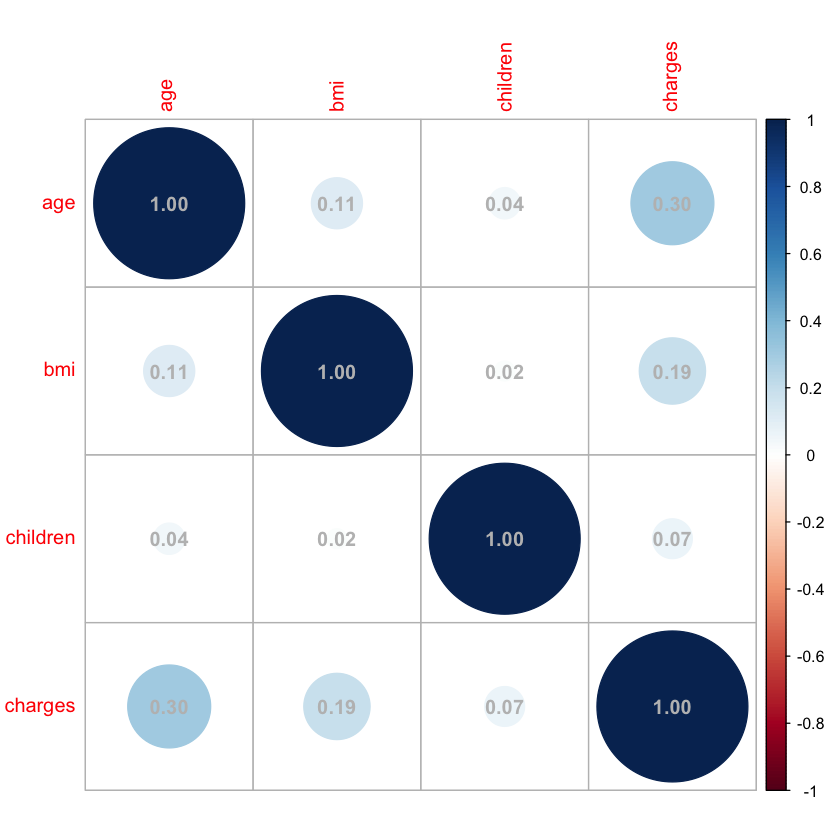

In [16]:
corrplot::corrplot(cor(df[c("age", "bmi", "children", "charges")]), addCoef.col = "grey")

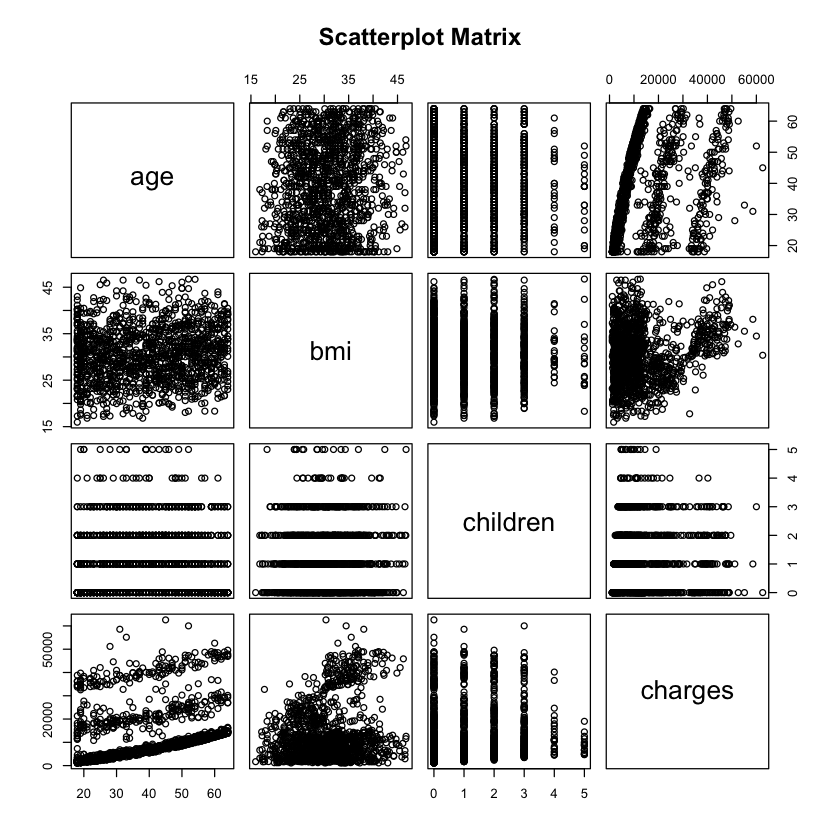

In [17]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
pairs(df[c("age", "bmi", "children", "charges")], main = "Scatterplot Matrix")

- Nhận xét: 
    - Tương quan giữa các biến độc lập:
        - age và bmi: Không có mối tương quan rõ ràng giữa tuổi (age) và chỉ số BMI. Các điểm dữ liệu phân bố rải rác, cho thấy không có mối quan hệ tuyến tính giữa hai biến này.
        - age và children: Số trẻ em (children) không có sự thay đổi đáng kể theo tuổi. Các điểm dữ liệu cũng không thể hiện một xu hướng rõ ràng, cho thấy đây là các biến độc lập.
        - bmi và children: Tương tự, chỉ số BMI không có mối quan hệ rõ ràng với số trẻ em. Dữ liệu phân bố đồng đều theo các giá trị của children.
    - Tương quan giữa biến phụ thuộc charges và các biến độc lập:
        - charges và age: Có mối quan hệ dương rõ ràng giữa charges và age. Khi tuổi tăng, chi phí y tế (charges) cũng có xu hướng tăng lên. Điều này gợi ý rằng tuổi là một yếu tố quan trọng ảnh hưởng đến chi phí y tế.
        - charges và bmi: Có xu hướng tăng nhẹ của charges khi BMI tăng, nhưng mối quan hệ này không hoàn toàn tuyến tính. Một số điểm có giá trị BMI cao có chi phí y tế thấp, cho thấy khả năng có các yếu tố khác ảnh hưởng.
        - charges và children: Không có mối quan hệ rõ ràng giữa số trẻ em và chi phí y tế (charges). Các giá trị charges phân bố tương đối đồng đều cho từng mức của children.

### XỬ LÝ BIẾN PHÂN LOẠI

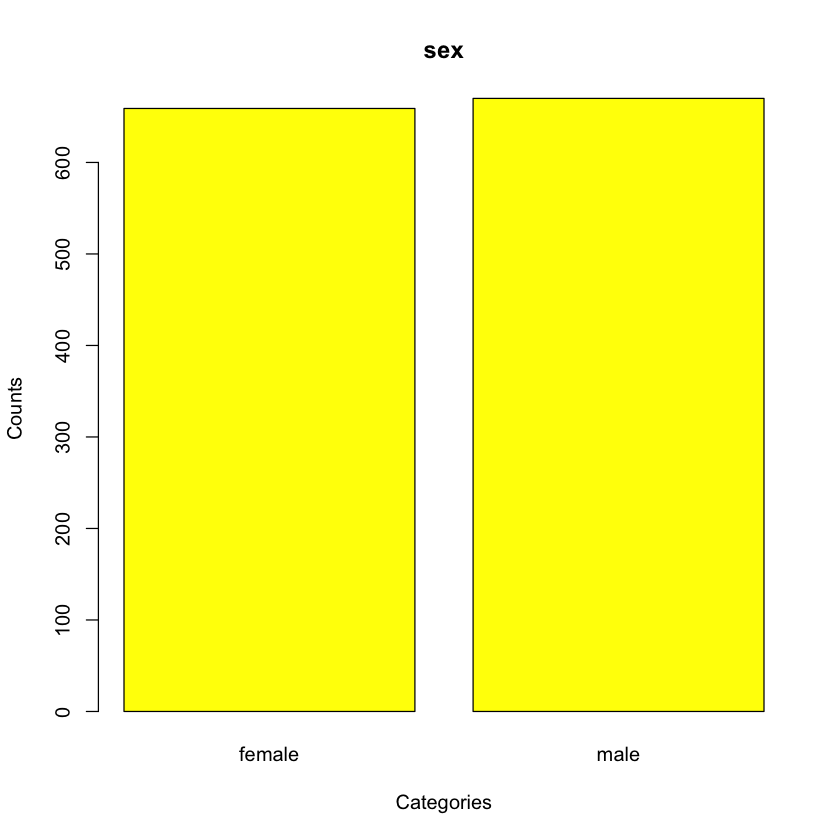

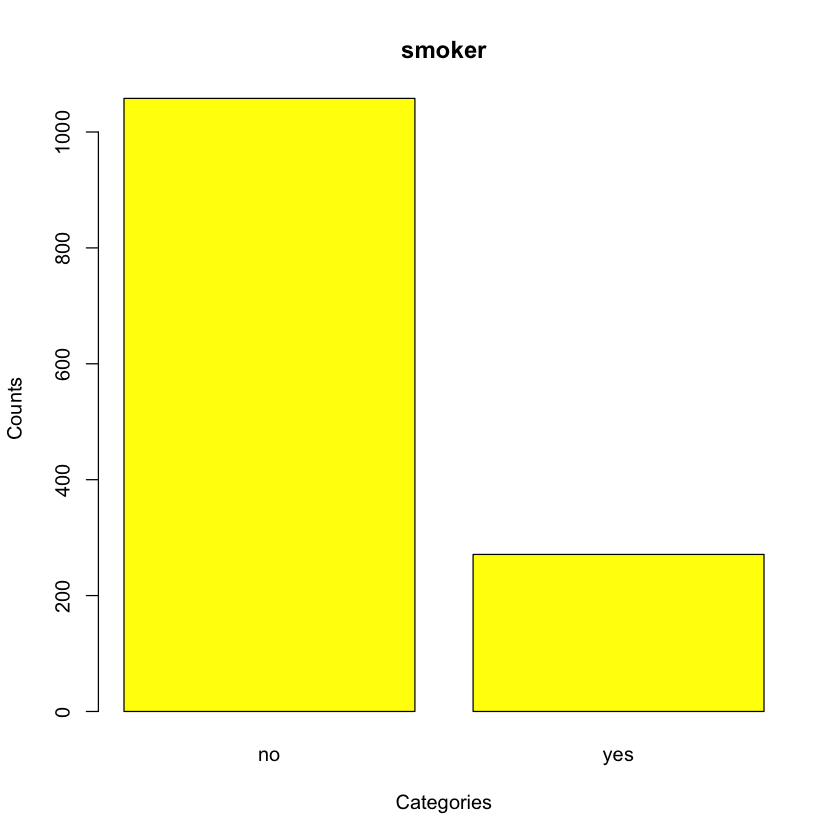

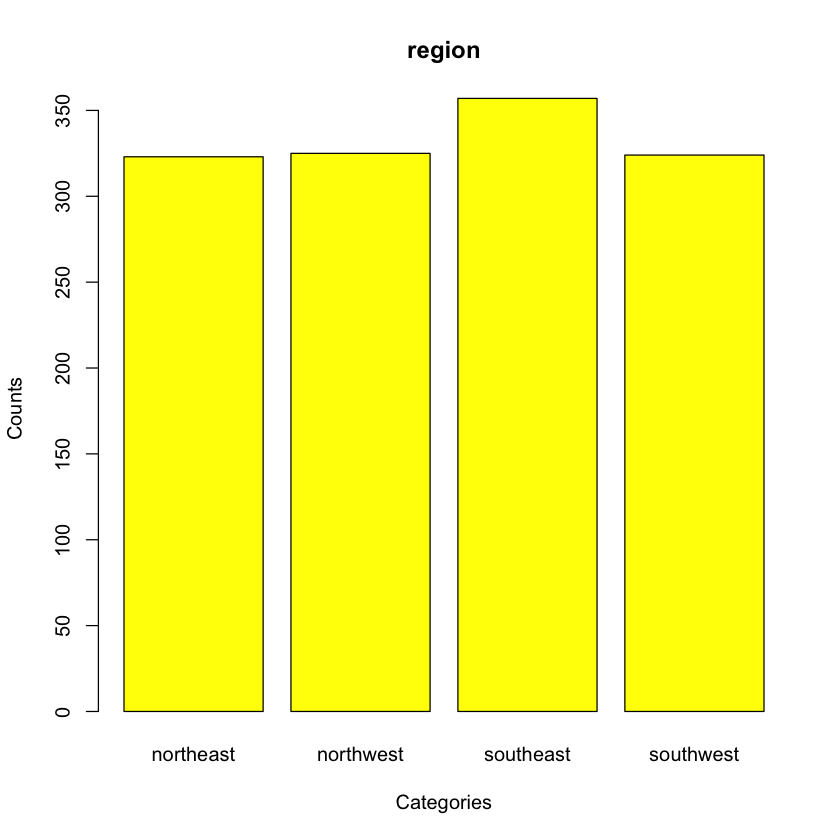

In [18]:
for (col in list_ploai){
    # Tạo bảng tần suất
    counts <- table(df[[col]])
    barplot(counts, main = col, xlab = "Categories", ylab = "Counts", col = "yellow")
}

- Ta thấy không có sự chênh lệch rõ ràng giữa tỷ lệ người được bảo hiểm là nam hay nữ, tương tự như vùng miền. Tuy nhiên số người được bảo hiểm không hút thuốc cao hơn hẳn so với người hút thuốc.

- Việc chấp nhận bảo hiểm có thể dựa trên tình trạng sức khỏe của người nộp đơn, được đánh giá thông qua quá trình kiểm tra sức khỏe. Trong quá trình này, các yếu tố như việc hút thuốc hay không hút thuốc có ảnh hưởng đáng kể đến khả năng được chấp nhận bảo hiểm, trong khi đó giới tính hoặc vùng miền không phải là một yếu tố ảnh hưởng

##### KIỂM TRA SỐ TIỀN CHI TRẢ CHO TỪNG NHÓM BIẾN PHÂN LOẠI: MỐI QUAN HỆ CỦA TỪNG NHÓM VỚI BIẾN CHARGES

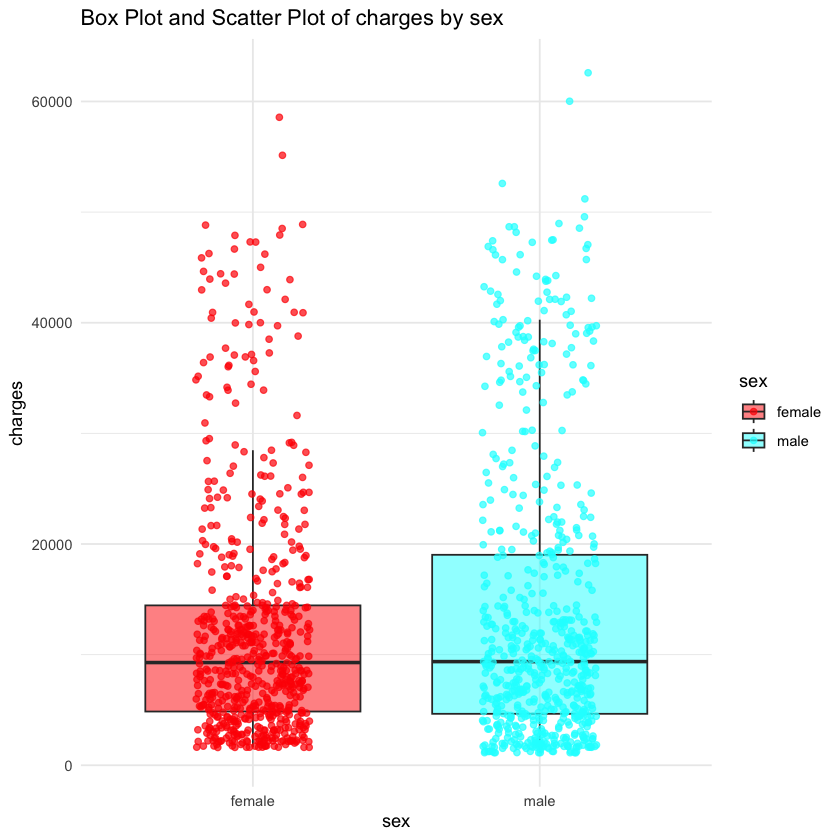

In [19]:
ggplot(df, aes(x = sex, y = charges)) +
  geom_boxplot(aes(fill = sex), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = sex), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of charges by sex", x = "sex", y = "charges") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df$sex)))) +  
  scale_color_manual(values = rainbow(length(unique(df$sex))))  

- Từ biểu đồ Boxplot này cho thấy không có sự khác biệt trung bình chi phí charges giữa 2 nhóm giới tính

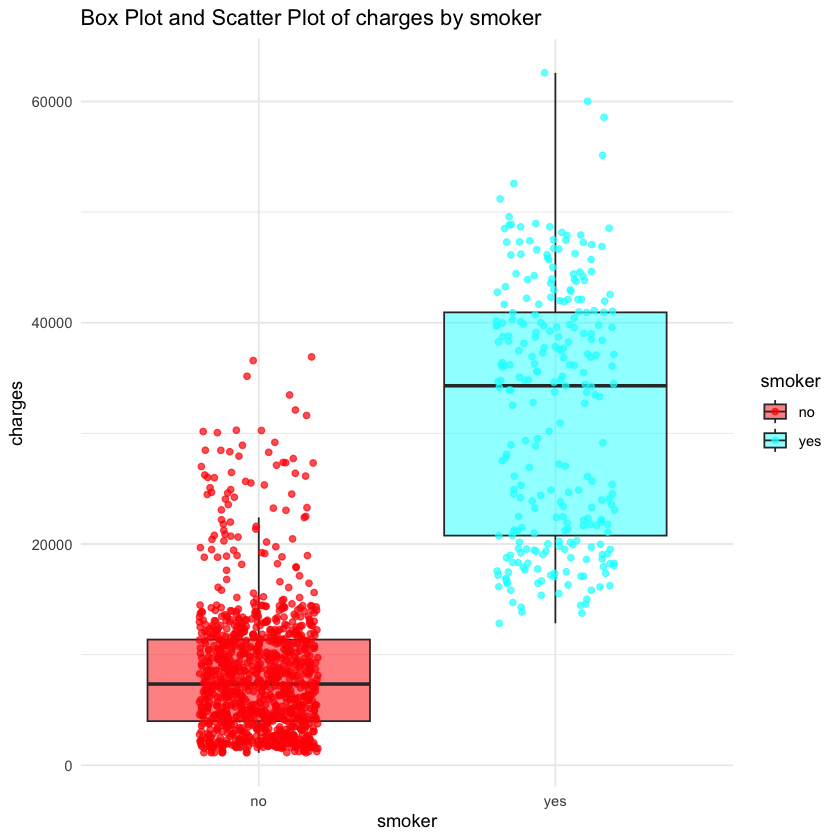

In [20]:
ggplot(df, aes(x = smoker, y = charges)) +
  geom_boxplot(aes(fill = smoker), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = smoker), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of charges by smoker", x = "smoker", y = "charges") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df$smoker)))) +  
  scale_color_manual(values = rainbow(length(unique(df$smoker))))  

- Biểu đồ boxplot này cho thấy có sự khác biệt rõ ràng giữa người có hút thuốc và người không có hút thuốc: charges cho người có hút thuốc cao hơn rõ ràng so với người không có hút thuốc

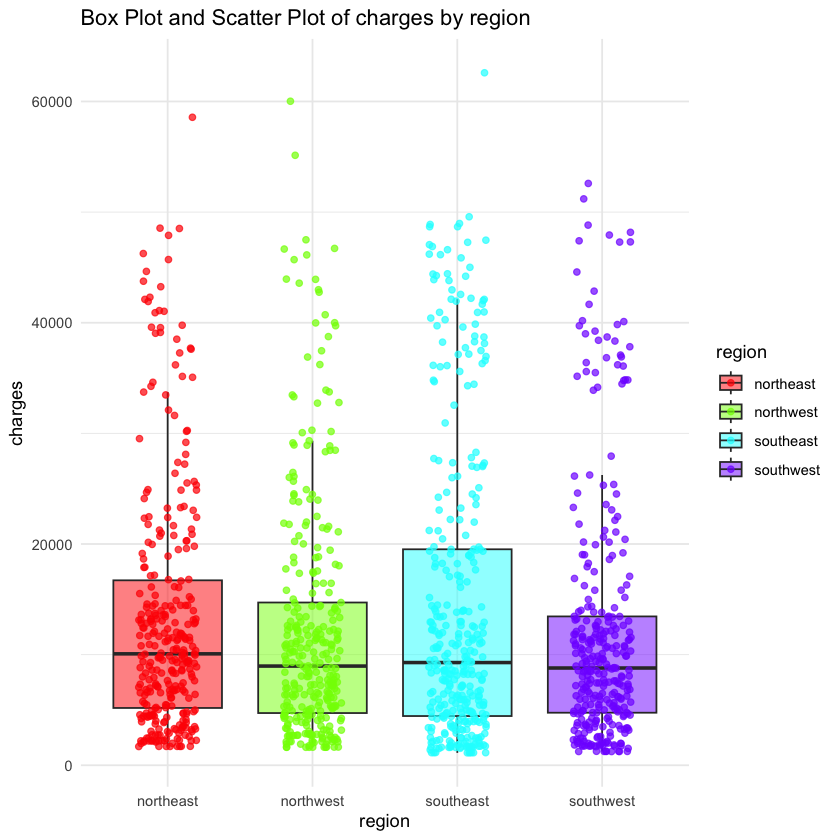

In [21]:
ggplot(df, aes(x = region, y = charges)) +
  geom_boxplot(aes(fill = region), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = region), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of charges by region", x = "region", y = "charges") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df$region)))) +  
  scale_color_manual(values = rainbow(length(unique(df$region))))  

- Không có sự khác biệt đáng kể về trung bình chi phí bảo hiểm giữa những khu vực khác nhau

In [22]:
## As factor 3 biến phân loại:
for (col in list_ploai){
    df[[col]] = as.factor(df[[col]])
}

In [23]:
# Lựa chọn ref cho biến phân loại:
# sex: male
# modelyear: no
# region: southwest
ref_dict <- c(sex = "male", smoker = "no", region = "southwest")
## As factor 3 biến phân loại với ref là giá trị có mod cao nhất:
for (col in list_ploai){
    df[[col]] = relevel(df[[col]], ref = ref_dict[col])
}


### CHIA BỘ DỮ LIỆU THÀNH TRAIN - TEST DATA

In [24]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df[sample, ]
test.data   <- df[!sample, ]
dim(train.data)
dim(test.data)

[1] 1066    7

[1] 263   7

#### KIỂM TRA HIỆN TƯỢNG ĐA CỘNG TUYẾN CỦA BIẾN LIÊN TỤC

In [25]:
df_ltuc = train.data[c("age", "bmi", "children", "charges")]

In [26]:
mod_reg = lm(charges ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = charges ~ ., data = df_ltuc)

Residuals:
   Min     1Q Median     3Q    Max 
-11765  -6733  -5090   6688  48672 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6964.56    1974.85  -3.527 0.000439 ***
age           262.84      24.81  10.592  < 2e-16 ***
bmi           298.33      58.14   5.132 3.42e-07 ***
children      519.74     283.19   1.835 0.066741 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11170 on 1062 degrees of freedom
Multiple R-squared:  0.1294,	Adjusted R-squared:  0.1269 
F-statistic: 52.61 on 3 and 1062 DF,  p-value: < 2.2e-16


In [27]:
vif(mod_reg)

age      bmi children 
1.013303 1.012446 1.002507

- Tất cả các biến đều có chỉ số vif rất nhỏ => Không tồn tại hiện tượng đa cộng tuyến

# MÔ HÌNH

## MÔ HÌNH ĐẦY ĐỦ

In [28]:
# Full model: 
full_model_1 <- lm(charges ~., data = train.data)
summary(full_model_1)


Call:
lm(formula = charges ~ ., data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-10868  -2984  -1006   1312  30183 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -13529.62    1184.71 -11.420  < 2e-16 ***
age                264.80      13.49  19.627  < 2e-16 ***
sexfemale         -147.33     373.84  -0.394  0.69359    
bmi                348.11      32.83  10.603  < 2e-16 ***
children           399.85     154.05   2.596  0.00957 ** 
smokeryes        23437.08     467.70  50.111  < 2e-16 ***
regionnortheast    955.75     539.12   1.773  0.07655 .  
regionnorthwest    998.32     531.88   1.877  0.06080 .  
regionsoutheast     17.66     531.94   0.033  0.97353    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6072 on 1057 degrees of freedom
Multiple R-squared:  0.7442,	Adjusted R-squared:  0.7422 
F-statistic: 384.3 on 8 and 1057 DF,  p-value: < 2.2e-16


- Với mức ý nghĩa alpha = 0.05:
    - Mô hình có ý nghĩa tổng thể (p-value < 2e-16) và giải thích được phần lớn phương sai (R-squared = 0.7442 và Adjusted R-squared = 0.7422, cho thấy mô hình giải thích được khoảng 74.42% phương sai của biến phụ thuộc charges).

In [29]:
anova(full_model_1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,15934210220,15934210220,432.251328,9.278193e-81
sex,1,790586638,790586638,21.446443,4.090969e-06
bmi,1,3191429893,3191429893,86.574721,7.519412e-20
children,1,394561057,394561057,10.703357,1.103990e-03
smoker,1,92797461039,92797461039,2517.340065,6.689116e-282
region,3,237659339,79219780,2.149015,9.244406e-02
Residuals,1057,38964507682,36863300,NA,NA


- Với mức ý nghĩa alpha = 0.05:
    - Các biến age, bmi, children, và smoker có giá trị p rất nhỏ (p < 0.05), nên được coi là có ý nghĩa thống kê đối với charges.
    - Đối với biến region: p-value = 0.09 > alpha = 0.05 nên gần như không có ý nghĩa thống kê đối với biến charges > chúng ta có thể loại bỏ biến này để thử dự đóan.


In [30]:
# AIC=2k−2ln(L)
AIC(full_model_1)

[1] 21608.77

### MÔ HÌNH 2: LOẠI BỎ BIẾN region:


In [31]:
## Loại region ra khỏi train.data
train.data_2 <- subset(train.data, select = -region)

In [32]:
# Full model: 
full_model_2 <- lm(charges ~., data = train.data_2)
summary(full_model_2)


Call:
lm(formula = charges ~ ., data = train.data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-11533  -2907  -1009   1323  29736 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12478.33    1106.03 -11.282  < 2e-16 ***
age            264.76      13.51  19.601  < 2e-16 ***
sexfemale     -146.77     374.27  -0.392  0.69502    
bmi            329.97      31.69  10.412  < 2e-16 ***
children       401.10     154.19   2.601  0.00941 ** 
smokeryes    23402.86     467.20  50.092  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6081 on 1060 degrees of freedom
Multiple R-squared:  0.7426,	Adjusted R-squared:  0.7414 
F-statistic: 611.7 on 5 and 1060 DF,  p-value: < 2.2e-16


- Với mức ý nghĩa alpha = 0.05:
    - Mô hình có ý nghĩa tổng thể (p-value < 2e-16) và giải thích được phần lớn phương sai (R-squared = 0.7426 và Adjusted R-squared = 0.7414, cho thấy mô hình giải thích được khoảng 74.26% phương sai của biến phụ thuộc charges).

In [33]:
anova(full_model_2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,15934210220,15934210220,430.85023,1.411944e-80
sex,1,790586638,790586638,21.37693,4.237574e-06
bmi,1,3191429893,3191429893,86.29410,8.534041e-20
children,1,394561057,394561057,10.66866,1.124576e-03
smoker,1,92797461039,92797461039,2509.18039,1.038329e-281
Residuals,1060,39202167021,36983176,NA,NA


- Với mức ý nghĩa alpha = 0.05:
    - Tất cả các biến độc lập đều có p-value < 0.05, điều này có nghĩa rằng tất cả các biến này đều có ý nghĩa thống kê

In [34]:
AIC(full_model_2)

[1] 21609.25

#### Giải thích param của stepAIC model được sử dụng trong bài:
- stepAIC: Sử dụng tiêu chí AIC để chọn mô hình tốt nhất (k = 2).
- full_model = lm(charges ~., data = train.data): Bắt đầu với mô hình đầy đủ gồm tất cả các biến độc lập.
- direction = "both": Sử dụng cả phương pháp thêm biến và loại bỏ biến để tìm ra mô hình tối ưu.
- trace = FALSE chỉ định rằng quá trình lựa chọn mô hình sẽ không hiển thị chi tiết từng bước thực hiện.

In [35]:
step_model <- stepAIC(full_model_1, direction = "both", trace = FALSE)
step_model


Call:
lm(formula = charges ~ age + bmi + children + smoker + region, 
    data = train.data)

Coefficients:
    (Intercept)              age              bmi         children  
       -13621.8            264.7            348.8            401.4  
      smokeryes  regionnortheast  regionnorthwest  regionsoutheast  
        23450.4            956.3            993.9             13.5  


 - Kết quả mô hình AIC này chỉ ra rằng mô hình đầy đủ là tốt nhất theo tiêu chí AIC, không cần phải loại bỏ bất kỳ biến nào. Điều này cho thấy rằng mỗi biến trong mô hình đầy đủ đều có ý nghĩa và đóng góp vào việc giải thích biến phụ thuộc trong dữ liệu.

### KIỂM ĐỊNH FISHER TỪNG PHẦN CHO 2 MÔ HÌNH:
- full_model_1 (bao gồm tất cả các biến độc lập) và full_model_2 (loại bỏ biến region)

- Giả thuyết Ho: Biến region không cải thiện đáng kể khả năng giải thích của mô hình.
- Giả thuyết H1: Biến region đóng góp đáng kể vào mô hình

In [36]:
# ## Fisher partial test
anova(full_model_1, full_model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1057,38964507682,NA,NA,NA,NA
2,1060,39202167021,-3,-237659339,2.149015,0.09244406


- Trong bảng anova so sánh sự khác nhau giữa hai mô hình cho thấy rằng, giá trị p cho cột thứ hai là 0.09244406, lớn hơn so với ý nghĩa alpha = 0.05, do đó ta chưa có đủ bằng chứng để bác bỏ H0 (rằng Biến region không đóng góp vào giải thích mô hình) ngụ ý rằng việc loại bỏ region đã được thực hiện trong mô hình thứ hai có ý nghĩa thống kê đối với sự khác biệt trong hiệu suất của các mô hình.

- Mô hình đơn giản hơn (full_model_2) được lựa chọn vì giảm bớt sự phức tạp mà không làm giảm đáng kể hiệu quả dự đoán.

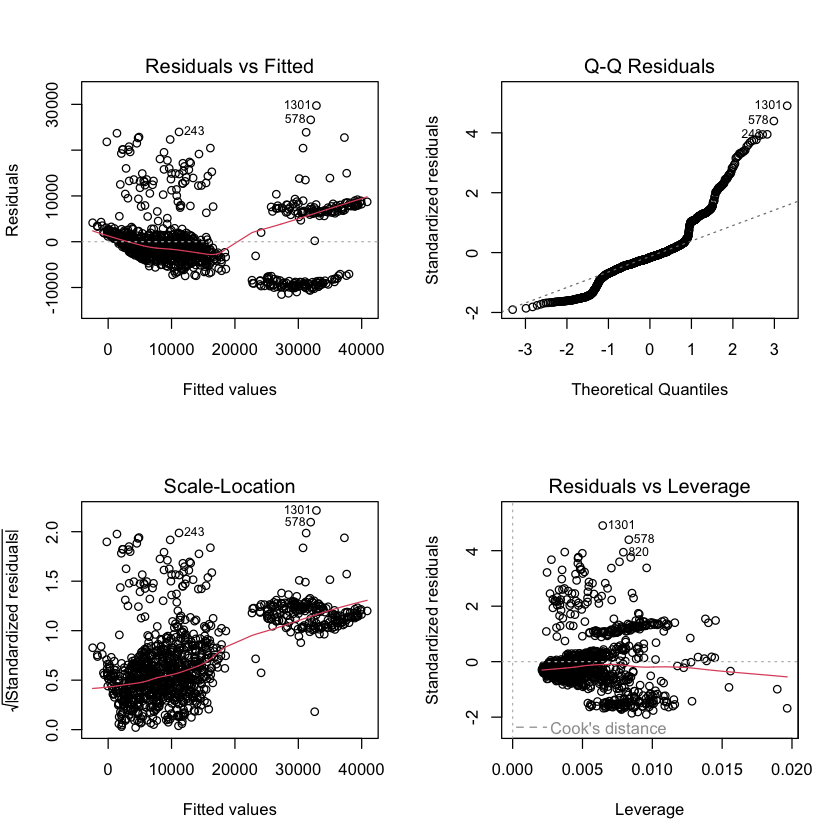

In [37]:
# Plot residuals
par(mfrow = c(2, 2))
plot(full_model_2)


### KIỂM ĐỊNHH PHÂN PHỐI CHUẨN CỦA PHẦN DƯ ((Normality of Residuals))
- Giả thuyết gốc (H0): Phần dư có phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không có phân phối chuẩn.

In [38]:
# Thực hiện Shapiro-Wilk test
shapiro.test(full_model_2$residuals)


	Shapiro-Wilk normality test

data:  full_model_2$residuals
W = 0.88842, p-value < 2.2e-16


- W (Shapiro-Wilk statistic): 0.965
- p-value: 2.2e-16
- p-value = 2.2e-16 < 0.05: Với mức ý nghĩa 0.05, ta bác bỏ giả thuyết gốc. Điều này có nghĩa là phần dư của mô hình hồi quy không có phân phối chuẩn.

### KIỂM ĐỊNH PHƯƠNG SAI KHÔNG ĐỔI (Homoscedasticity)
- Giả thuyết gốc (H0): Phương sai của phần dư là không đổi (homoscedasticity).
- Giả thuyết đối (H1): Phương sai của phần dư thay đổi (heteroscedasticity)

In [39]:
bptest(full_model_2)


	studentized Breusch-Pagan test

data:  full_model_2
BP = 91.024, df = 5, p-value < 2.2e-16


- p-value = 2.2e-16 < 0.05: 
- Với mức ý nghĩa 0.05, ta bác bỏ giả thuyết gốc. Điều này có nghĩa là có dấu hiệu của heteroscedasticity trong mô hình hồi quy tuyến tính


### KIỂM ĐỊNH TỰ TƯƠNG QUAN (AUTOCORRELATION)
- Giả thuyết gốc (H0): Không có tự tương quan (rho = 0).
- Giả thuyết đối (H1): Có tự tương quan (rho ≠ 0).

In [40]:
# Thực hiện kiểm định Durbin-Watson
durbinWatsonTest(full_model_2)

 lag Autocorrelation D-W Statistic p-value
   1     -0.05534041      2.110329   0.078
 Alternative hypothesis: rho != 0

- D-W Statistic ≈ 2.110329: Giá trị này rất gần với 2, cho thấy không có tự tương quan đáng kể trong phần dư.
- p-value = 0.078 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có dấu hiệu của tự tương quan trong phần dư của mô hình hồi quy.


- Dựa trên kết quả kiểm định Durbin-Watson, không có bằng chứng để kết luận rằng phần dư của mô hình hồi quy có tự tương quan. Điều này cho thấy mô hình hồi quy thỏa mãn giả định về tự tương quan của phần dư.

### KẾT LUẬN:
- Mô hình vi phạm giả định phương sai đồng nhất.
- Phần dư không tuân theo phân phối chuẩn.
- Do các vi phạm này, mô hình có thể không đáng tin cậy trong việc suy diễn thống kê

# DỰ ĐOÁN

In [41]:
# Thực hiện dự đoán
predictions <- full_model_2 %>% predict(test.data)


In [42]:
# Khoảng tin cậy
predict(full_model_2, newdata =test.data , interval = "confidence", level=0.95)

,fit,lwr,upr
1,25014.2732,23899.35110,26129.1953
2,3831.4530,3009.94559,4652.9604
4,3750.5766,2925.66101,4575.4922
13,4962.0105,4144.86068,5779.1603
16,1070.3876,233.19762,1907.5775
17,11699.7790,11063.05483,12336.5031
21,15140.8152,14245.88590,16035.7445
23,3539.2391,2649.60151,4428.8767
24,30713.1964,29768.86750,31657.5252
28,13553.4405,12817.69137,14289.1896


In [43]:
# Khoảng dự đoán
predict(full_model_2, newdata =test.data , interval = "prediction", level=0.95)

,fit,lwr,upr
1,25014.2732,13029.3913,36999.16
2,3831.4530,-8129.7016,15792.61
4,3750.5766,-8210.8125,15711.97
13,4962.0105,-6998.8456,16922.87
16,1070.3876,-10891.8543,13032.63
17,11699.7790,-250.1065,23649.66
21,15140.8152,3174.3937,27107.24
23,3539.2391,-8426.7878,15505.27
24,30713.1964,18742.9791,42683.41
28,13553.4405,1597.8698,25509.01


In [44]:
ss=RMSE(predictions, test.data$charges)
ss

[1] 5812.565

In [45]:
summary(test.data$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1137    5008    9626   13768   18094   48970 

- RMSE cho biết độ lệch trung bình giữa giá trị dự đoán và giá trị thực tế là 5812.56.
- Mean=13768 và Median=9626Chị :
- RMSE chiếm khoảng 42% của giá trị trung bình.
- RMSE cũng gần bằng 60% của giá trị trung vị.
- Như vậy, độ sai lệch này tương đối lớn so với phân phối của dữ liệu, cho thấy mô hình chưa dự đoán chính xác.